## All imports

In [30]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## csv file containing raw CI timing information
Make sure you update this appropriately!!

In [1]:
csvFile = "cuml-prs.csv"

## load the data
Load the csv file and print some high level info about it

In [21]:
df = pd.read_csv(csvFile)
print("Dataset size: %s" % str(df.shape))
print("Columns: %s" % str(df.columns))

Dataset size: (101019, 6)
Columns: Index([u'PR#', u'author', u'commit', u'test', u'status', u'time(s)'], dtype='object')


In [22]:
df.isnull().sum()

PR#           0
author        0
commit        0
test       6561
status     6561
time(s)    6561
dtype: int64

## timings

In [51]:
# Let us ignore commits which did not trigger CI
df_no_na = df.dropna()
print("Dataset after na-pruning: %s" % str(df_no_na.shape))

Dataset after na-pruning: (94458, 6)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x6ffb84c2bd0>]], dtype=object)

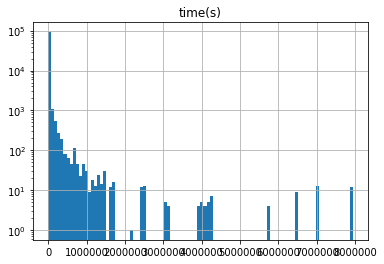

In [55]:
df_no_na.hist(column="time(s)", bins=100, log=True)

In [65]:
# let us also remove certain outliers (more than 8 hrs of CI time)
flags = df_no_na["time(s)"] <= 28800
df_timings = df_no_na[flags]
print("Dataset after time filtering: %s" % str(df_timings.shape))

# Let us also only consider "gpuCI/cuml/*" tests
flags = df_timings["test"].str.contains("gpuCI/cuml/")
df_cuml = df_timings[flags]
print("Dataset after choosing only gpuCI/cuml/* CI tests: %s" % str(df_cuml.shape))

Dataset after time filtering: (89945, 6)
Dataset after choosing only gpuCI/cuml/* CI tests: (77754, 6)


In [59]:
groups = df_cuml.groupby("test")

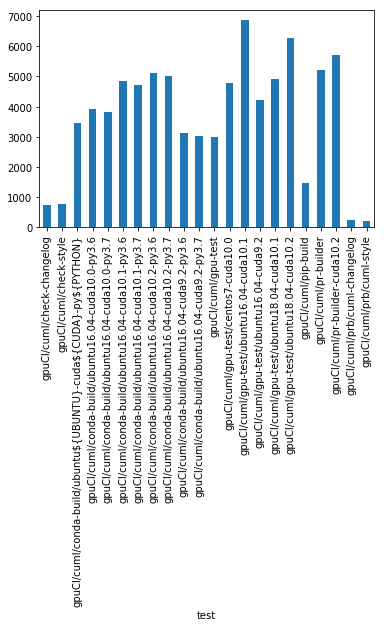

In [60]:
groups["time(s)"].mean().plot(kind="bar")

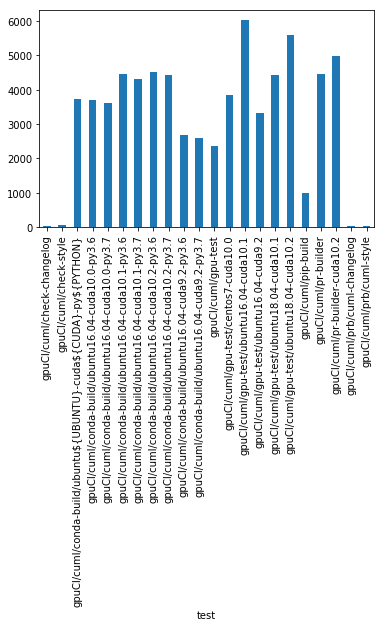

In [61]:
groups["time(s)"].median().plot(kind="bar")